#   Sınıflandırma Problemleri için Hata Metrikleri


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
# Irıs dataset loading
iris_dataset = datasets.load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Data train and test split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],test_size=0.3 ,random_state=42)

In [5]:
#KNN model training
from sklearn.preprocessing import StandardScaler # Standardization

scale = StandardScaler() # Standardization
X_train_transformed = scale.fit_transform(X_train) 
X_test_transformed = scale.transform(X_test)

knn = KNeighborsClassifier() # KNN model
knn.fit(X_train_transformed, y_train) # KNN model training

print('KNN Training Score: {:6.2f}%'.format(100*knn.score(X_train_transformed, y_train))) # KNN model training score
print('KNN Test Score: {:6.2f}%'.format(100*knn.score(X_test_transformed, y_test))) # KNN model test score



KNN Training Score:  95.24%
KNN Test Score: 100.00%


In [6]:
#Logistic Regression model training
logit = LogisticRegression(solver='liblinear') # Logistic Regression model
logit.fit(X_train_transformed, y_train) # Logistic Regression model training

print('LogReg Training Score: {:6.2f}%'.format(100*logit.score(X_train_transformed, y_train))) # Logistic Regression model training score
print('LogReg Test Score: {:6.2f}%'.format(100*logit.score(X_test_transformed, y_test)))    # Logistic Regression model test score

LogReg Training Score:  88.57%
LogReg Test Score:  91.11%


In [7]:
knn.predict_proba(X_test_transformed[:5,]) # KNN model prediction probability

array([[0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2]])

In [8]:
np.set_printoptions(suppress=True, precision=2) # Üretilen çıktıyı istenilen formata getirme
logit.predict_proba(X_test_transformed[:5,]) # [Setosa, Versicolor, Virginica]

array([[0.05, 0.69, 0.26],
       [0.96, 0.04, 0.  ],
       [0.  , 0.41, 0.59],
       [0.05, 0.5 , 0.45],
       [0.02, 0.59, 0.4 ]])

In [11]:

print(f'Features: {X_test_transformed[4]}, Label: {y_test[4]}')  # Test setinden bir örnek

Features: [ 1.15 -0.5   0.54  0.22], Label: 1


In [12]:
print('KNN Confusion Matrix: \n\n', confusion_matrix(y_test, knn.predict(X_test_transformed)))  # KNN model confusion matrix

KNN Confusion Matrix: 

 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [13]:
print('Logistic Regression Confusion Matrix: \n\n', confusion_matrix(y_test, logit.predict(X_test_transformed))) # Logistic Regression model confusion matrix

Logistic Regression Confusion Matrix: 

 [[19  0  0]
 [ 0  9  4]
 [ 0  0 13]]


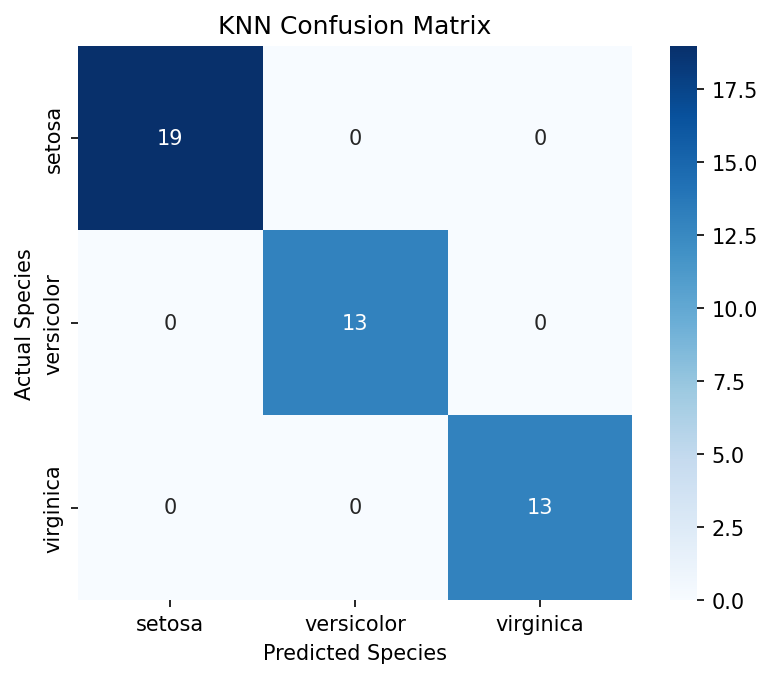

In [14]:
# knn_confusion matrix visualization with sns.heatmap

knn_confusion = confusion_matrix(y_test, knn.predict(X_test_transformed)) # KNN model confusion matrix

plt.figure(dpi=150)
plt.title('KNN Confusion Matrix')
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=iris_dataset['target_names'],
           yticklabels=iris_dataset['target_names'])
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species');




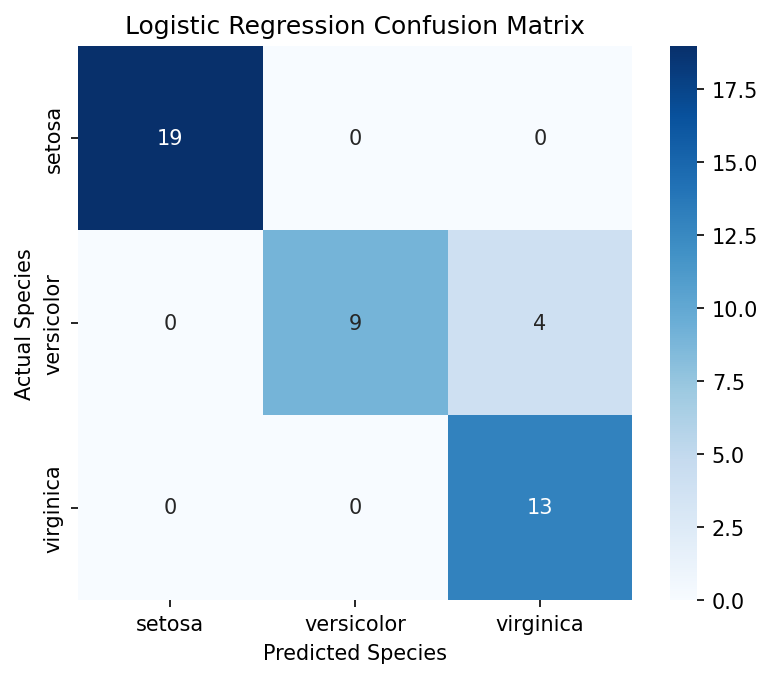

In [15]:
# Logistic Regression model confusion matrix visualization with sns.heatmap

logit_confusion = confusion_matrix(y_test, logit.predict(X_test_transformed))

plt.figure(dpi=150)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=iris_dataset['target_names'],
           yticklabels=iris_dataset['target_names'])
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species');
#plt.savefig("confusion_matrix_logit_iris.png")